In [1]:
# Libraries
import numpy as np # Data manipulation
from pynq import allocate, Overlay, MMIO # Access HWH, BIT, and AXI-LITE 
import matplotlib.pyplot as plt # Plot data
import time # Track elapsed time
import os # Access to OS interfaces dependent functionality

In [2]:
# Explicitly set working directory
os.chdir("/home/xilinx/jupyter_notebooks/Notebook_Tests/dsp_test")
print(f"Verifying notebook's working directory: {os.getcwd()}")
print(os.listdir())

Verifying notebook's working directory: /home/xilinx/jupyter_notebooks/Notebook_Tests/dsp_test
['design_dsp.bit', 'dsp_test.ipynb', '.ipynb_checkpoints', 'design_dsp.hwh']


In [3]:
# Explicitly set working directory
os.chdir("/home/xilinx/jupyter_notebooks/Notebook_Tests/dsp_test")
print(f"Verifying notebook's working directory: {os.getcwd()}")
print(f"Files in current working directory: {os.listdir()}")

# Download bistream & parse HWH for IPI block diagram
ol = Overlay("design_dsp.bit") # hwh is parsed here

# Interrogate HWH & display information about design
print(f"IP blocks: {ol.ip_dict.keys()}")
print(f"\nram_re: {ol.ip_dict['ram_re_0']}")

Verifying notebook's working directory: /home/xilinx/jupyter_notebooks/Notebook_Tests/dsp_test
Files in current working directory: ['design_dsp.bit', 'dsp_test.ipynb', '.ipynb_checkpoints', 'design_dsp.hwh']


IP blocks: dict_keys(['axi_dma', 'ram_re_0', 'zynq_ultra_ps_e_0'])

ram_re: {'type': 'CoRSoC:VMC:ram_re:1.0', 'mem_id': 'ram_re_ip_s_axi', 'memtype': 'REGISTER', 'gpio': {}, 'interrupts': {}, 'parameters': {'Component_Name': 'design_1_ram_re_0_2', 'EDK_IPTYPE': 'PERIPHERAL', 'C_RAM_RE_IP_S_AXI_BASEADDR': '0xA0010000', 'C_RAM_RE_IP_S_AXI_HIGHADDR': '0xA001FFFF', 'CLK_DOMAIN': 'design_1_zynq_ultra_ps_e_0_0_pl_clk0', 'FREQ_HZ': '96968727', 'HAS_TKEEP': '0', 'HAS_TLAST': '1', 'HAS_TREADY': '0', 'HAS_TSTRB': '0', 'INSERT_VIP': '0', 'LAYERED_METADATA': 'xilinx.com:interface:datatypes:1.0 {TDATA {datatype {name {attribs {resolve_type immediate dependency {} format string minimum {} maximum {}} value {}} bitwidth {attribs {resolve_type immediate dependency {} format long minimum {} maximum {}} value 16} bitoffset {attribs {resolve_type immediate dependency {} format long minimum {} maximum {}} value 0} real {fixed {fractwidth {attribs {resolve_type immediate dependency {} format long minimum {

In [4]:
# Get name of ram_re
ram_re = ol.ip_dict['ram_re_0']['fullpath']
print(f"\nram_re name: {ram_re}")      

# Get base address of ram_re
print(f"\nram_re address: {int(hex(ol.ip_dict['ram_re_0']['phys_addr']),16)}")
print(f"ram_re address hex: {hex(ol.ip_dict['ram_re_0']['phys_addr'])}")
ram_re_addr = 0xa0010000

# Get address range of ram_re
print(f"\nram_re address range: {int(hex(ol.ip_dict['ram_re_0']['addr_range']),16)}")
print(f"ram_re address range hex: {hex(ol.ip_dict['ram_re_0']['addr_range'])}")
ram_re_addr_range = 0x10000

# Create MMIO object to interact with AXI Lite interface of ram_re
ram_re_mmio = MMIO(ram_re_addr, ram_re_addr_range)
print(f"\nram_re_mmio: {ram_re_mmio}")


ram_re name: ram_re_0

ram_re address: 2684420096
ram_re address hex: 0xa0010000

ram_re address range: 65536
ram_re address range hex: 0x10000

ram_re_mmio: <pynq.mmio.MMIO object at 0xffff7ad508e0>


In [5]:
'''
#print("===== AXI-LITE =====\n\n")
input_data = 1
address_offset = 0x0 # Must be multiple of 4
ram_re_mmio.write(address_offset, input_data)
time.sleep(0.1)
print(f"Data sent to ram_re: {ram_re_mmio.read(address_offset)}")

#print("\n\n===== DMA =====\n\n")
# Get the DMA instance
dma = ol.axi_dma 

plt.subplots(figsize=(12,10))
for i in range(10):
    if i == 7:
        input_data = 0
        address_offset = 0x0 # Must be multiple of 4
        ram_re_mmio.write(address_offset, input_data)
        time.sleep(0.1)
        print(f"Data sent to ram_re: {ram_re_mmio.read(address_offset)} after iter {i}")

    # Allocate memory for DMA transfer
    output_buffer = allocate(shape=(50,), dtype=np.uint16)

    # Start DMA transfer
    dma.recvchannel.transfer(output_buffer)
    dma.recvchannel.wait()

    # Adapt DMA output
    result = output_buffer.astype(np.int16)
    
    if i == 1:
        temp_output_buffer_1 = output_buffer
        temp_result_1 = result
    if i == 8:
        temp_output_buffer_8 = output_buffer
        temp_result_8 = result
        
    # Plot data
    plt.subplot(5,2,i+1)
    plt.plot(result, label="dsp_RAM")
    plt.xlabel("Sample Index [n]")
    plt.ylabel("Magnitude")
    plt.title(f"Output Buffer Plot {i}")
    plt.grid(True)
plt.tight_layout()    
plt.show()

#print(f"DMA output of iter {i}:\n {output_buffer}")
print(f"\ndma_re data of iter 1:\n {temp_result_1}")

rint(f"\ndma_re data of iter 8:\n {temp_result_8}")
'''

'\n#print("===== AXI-LITE =====\n\n")\ninput_data = 1\naddress_offset = 0x0 # Must be multiple of 4\nram_re_mmio.write(address_offset, input_data)\ntime.sleep(0.1)\nprint(f"Data sent to ram_re: {ram_re_mmio.read(address_offset)}")\n\n#print("\n\n===== DMA =====\n\n")\n# Get the DMA instance\ndma = ol.axi_dma \n\nplt.subplots(figsize=(12,10))\nfor i in range(10):\n    if i == 7:\n        input_data = 0\n        address_offset = 0x0 # Must be multiple of 4\n        ram_re_mmio.write(address_offset, input_data)\n        time.sleep(0.1)\n        print(f"Data sent to ram_re: {ram_re_mmio.read(address_offset)} after iter {i}")\n\n    # Allocate memory for DMA transfer\n    output_buffer = allocate(shape=(50,), dtype=np.uint16)\n\n    # Start DMA transfer\n    dma.recvchannel.transfer(output_buffer)\n    dma.recvchannel.wait()\n\n    # Adapt DMA output\n    result = output_buffer.astype(np.int16)\n    \n    if i == 1:\n        temp_output_buffer_1 = output_buffer\n        temp_result_1 = resu

## Test 2

Reset signal sent to ram_re: 0
Data sent to ram_re: 1
Data sent to ram_re: 0 after iter 7


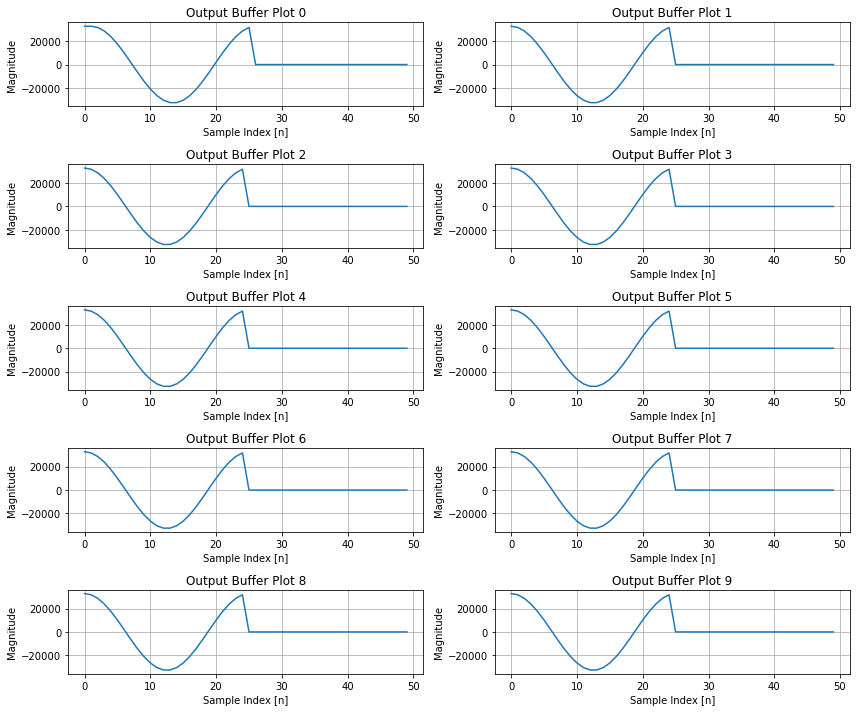


dma_re data of iter 1:
 [ 32767  31738  28714  23886  17558  10126   2058  -6140 -13952 -20888
 -26510 -30466 -32510 -32510 -30466 -26510 -20888 -13952  -6140   2058
  10126  17558  23886  28714  31738      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0]

dma_re data of iter 8:
 [ 32767  31738  28714  23886  17558  10126   2058  -6140 -13952 -20888
 -26510 -30466 -32510 -32510 -30466 -26510 -20888 -13952  -6140   2058
  10126  17558  23886  28714  31738      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0]


In [6]:
#print("===== AXI-LITE =====\n\n")
input_data = 0 # Reset signal
address_offset = 0x0 # Must be multiple of 4
ram_re_mmio.write(address_offset, input_data)
time.sleep(0.1)
print(f"Reset signal sent to ram_re: {ram_re_mmio.read(address_offset)}")
input_data = 1 # Enable signal
ram_re_mmio.write(address_offset, input_data)
time.sleep(0.1)
print(f"Data sent to ram_re: {ram_re_mmio.read(address_offset)}")

#print("\n\n===== DMA =====\n\n")
# Get the DMA instance
dma = ol.axi_dma 

plt.subplots(figsize=(12,10))
for i in range(10):
    if i == 7:
        input_data = 0
        address_offset = 0x0 # Must be multiple of 4
        ram_re_mmio.write(address_offset, input_data)
        time.sleep(0.1)
        print(f"Data sent to ram_re: {ram_re_mmio.read(address_offset)} after iter {i}")

    # Allocate memory for DMA transfer
    output_buffer = allocate(shape=(50,), dtype=np.uint16)
    output_buffer.fill(0) # Ensure buffer is zeroed before transfer - flush
    
    # Start DMA transfer
    dma.recvchannel.transfer(output_buffer)
    dma.recvchannel.wait()

    # Adapt DMA output
    result = output_buffer.astype(np.int16)
    
    if i == 1:
        temp_output_buffer_1 = output_buffer
        temp_result_1 = result
    if i == 8:
        temp_output_buffer_8 = output_buffer
        temp_result_8 = result
        
    # Plot data
    plt.subplot(5,2,i+1)
    plt.plot(result, label="dsp_RAM")
    plt.xlabel("Sample Index [n]")
    plt.ylabel("Magnitude")
    plt.title(f"Output Buffer Plot {i}")
    plt.grid(True)
plt.tight_layout()    
plt.show()

#print(f"DMA output of iter {i}:\n {output_buffer}")
print(f"\ndma_re data of iter 1:\n {temp_result_1}")
print(f"\ndma_re data of iter 8:\n {temp_result_8}")